In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/sign MNIST  Dataset/sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
X_train = train.drop('label', axis=1)
y_train = train['label']

In [5]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [6]:
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [7]:
target_values = np.sort(y_train.unique())

<BarContainer object of 24 artists>

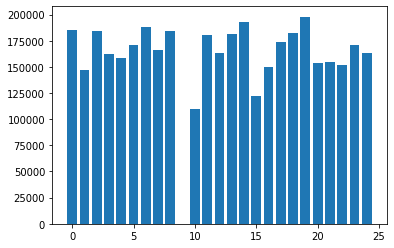

In [8]:
count_data = pd.DataFrame(train.groupby('label', axis=0).sum()).iloc[:,:1]
plt.bar(target_values, count_data.iloc[:,0])

In [9]:
count_data

,pixel1
label,
0,184881
1,146668
2,183909
3,162364
4,158693
5,171240
6,188464
7,166276
8,184173


In [10]:
X_train.iloc[0, :].shape[0]

784

In [11]:
X_train.shape

(27455, 784)

In [12]:
X_train = X_train.values
y_train = y_train.values

In [13]:
X_train.shape, y_train.shape

((27455, 784), (27455,))

In [14]:
img = X_train[0].reshape(28, 28)

In [15]:
img.shape

(28, 28)

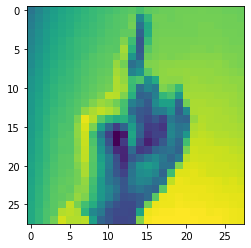

In [16]:
plt.imshow(img)

In [17]:
X_train = X_train.reshape(27455, 28, 28)

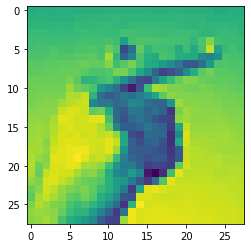

In [18]:
plt.imshow(X_train[52])

In [19]:
X_train[:5]

array([[[107, 118, 127, ..., 170, 170, 169],
        [111, 121, 129, ..., 171, 171, 170],
        [113, 123, 131, ..., 171, 171, 171],
        ...,
        [142, 150, 159, ..., 202, 201, 200],
        [142, 151, 160, ..., 204, 203, 202],
        [142, 151, 160, ..., 204, 203, 202]],

       [[155, 157, 156, ..., 138,  92, 108],
        [158, 159, 159, ..., 142, 116, 143],
        [161, 161, 161, ..., 147, 125, 140],
        ...,
        [162, 159, 145, ...,  91, 101,  94],
        [153, 139, 115, ...,  97,  95, 120],
        [135, 116,  95, ..., 103, 135, 149]],

       [[187, 188, 188, ...,  66,  77,  83],
        [188, 189, 189, ...,  73,  73,  71],
        [190, 190, 190, ...,  74,  68,  61],
        ...,
        [212, 198, 175, ..., 195, 193, 192],
        [202, 179, 152, ..., 195, 194, 193],
        [198, 166, 132, ..., 195, 194, 195]],

       [[211, 211, 212, ...,  51,  52,  54],
        [212, 213, 215, ...,  44,  49,  46],
        [215, 217, 218, ...,  52,  41,  45],
        ..

In [20]:
X_train[0].shape

(28, 28)

In [21]:
X_train_reshape = X_train.reshape((27455, 28, 28, 1))

In [22]:
X_train_reshape.shape

(27455, 28, 28, 1)

In [23]:
X_train_reshape[0].shape

(28, 28, 1)

In [24]:
np.max(X_train), np.min(X_train)

(255, 0)

In [25]:
X_train_norm = X_train_reshape / 255

In [26]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 1024)              5538816   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                        

In [27]:
tf.random.set_seed(123)

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

model.fit(X_train_norm, y_train, epochs=10)


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
858/858 [==============================] - 11s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 2/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 3/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 4/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 5/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 6/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 7/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 8/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 9/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410
Epoch 10/10
858/858 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.0410


In [28]:
model.save('model1.h5')

In [29]:
with tf.device('/CPU:0'):
    prediction = (model.predict(X_train_reshape[7:8] / 255))

1/1 [==============================] - 0s 237ms/step


In [30]:
target_values[np.argmax(prediction)]

0

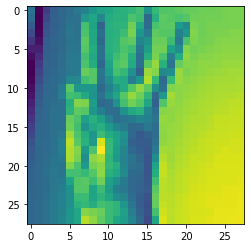

In [31]:
plt.imshow(X_train_reshape[7:8].squeeze())

In [32]:
y_train[7]

22

In [33]:
prediction = (model.predict(X_train_reshape[9:10] / 255))

target_values[np.argmax(prediction)]

1/1 [==============================] - 0s 96ms/step


0

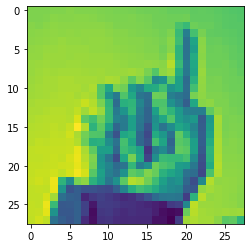

In [34]:
plt.imshow(X_train_reshape[9:10].squeeze())

In [35]:
y_train[9]

3

In [36]:
test = pd.read_csv('/content/drive/MyDrive/sign MNIST  Dataset/sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [37]:
X_test = test.drop('label', axis=1).values
y_test = test['label'].values

In [38]:
X_test.shape

(7172, 784)

In [39]:
X_test = X_test.reshape(7172, 28, 28)

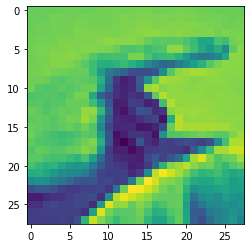

In [40]:
plt.imshow(X_test[0])

In [41]:
X_test_reshape = X_test.reshape((7172, 28, 28, 1))

In [42]:
X_test_norm = X_test_reshape / 255

In [43]:
model1 = tf.keras.models.load_model('model1.h5')

In [44]:
model1.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0462


[nan, 0.04615170136094093]

### Model 1:
* accuracy: 0.805
* loss: 0.661

In [45]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [46]:
tf.random.set_seed(123)

model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

model2.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


858/858 [==============================] - 3s 3ms/step - loss: 3.0107 - accuracy: 0.1221
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 1.8352 - accuracy: 0.4282
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.9499 - accuracy: 0.7017
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.4090 - accuracy: 0.8854
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.1485 - accuracy: 0.9681
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0572 - accuracy: 0.9930
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0259 - accuracy: 0.9985
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0144 - accuracy: 0.9997
Epoch 9/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0091 - accuracy: 0.9999
Epoch 10/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0065 - accuracy: 1.0000


In [47]:
model2.save('model2.h5')

In [48]:
model2 = tf.keras.models.load_model('model2.h5')

In [49]:
model2.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.3884 - accuracy: 0.9027


[0.38840553164482117, 0.902677059173584]

### Model 2
* accuracy: 0.904
* loss: 0.36

In [50]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)             

In [52]:
tf.random.set_seed(123)

model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )


model3.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1968 - accuracy: 0.0421
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1965 - accuracy: 0.0428
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1978 - accuracy: 0.0419
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1952 - accuracy: 0.0433
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1964 - accuracy: 0.0430
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1952 - accuracy: 0.0443
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1966 - accuracy: 0.0444
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1970 - accuracy: 0.0426
Epoch 9/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1965 - accuracy: 0.0432
Epoch 10/10
858/858 [==============================] - 3s 3ms/step - loss: 3.1977 - accuracy: 0.0436

In [53]:
model3.save('model3.h5')

In [54]:
model3.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 2ms/step - loss: 3.2455 - accuracy: 0.0343


[3.2455098628997803, 0.0343000553548336]

### Model 3
* accuracy: 0.034
* loss: 3.2544

**Very Bad**

In [55]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 500)              

In [57]:
tf.random.set_seed(123)

model4.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

model4.fit(X_train_norm, y_train, epochs=10)

Epoch 1/10
858/858 [==============================] - 3s 3ms/step - loss: 0.7853 - accuracy: 0.7539
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 0.3426 - accuracy: 0.9019
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.1344 - accuracy: 0.9713
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0553 - accuracy: 0.9932
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0253 - accuracy: 0.9992
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0143 - accuracy: 0.9997
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 9/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 10/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0042 - accuracy: 1.0000

In [58]:
model4.save('model4.h5')

In [59]:
model4 = tf.keras.models.load_model('model4.h5')

In [60]:
model4.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.8760


[0.43590235710144043, 0.8760457038879395]

### Model 4
* accuracy: 0.885
* loss: 0.402

In [61]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)             

In [62]:
tf.random.set_seed(123)

model5.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

model5.fit(X_train_norm, y_train, epochs=7)


Epoch 1/7
858/858 [==============================] - 3s 3ms/step - loss: 3.0447 - accuracy: 0.1149
Epoch 2/7
858/858 [==============================] - 3s 3ms/step - loss: 1.8704 - accuracy: 0.4220
Epoch 3/7
858/858 [==============================] - 3s 3ms/step - loss: 0.8925 - accuracy: 0.7239
Epoch 4/7
858/858 [==============================] - 3s 3ms/step - loss: 0.3675 - accuracy: 0.8979
Epoch 5/7
858/858 [==============================] - 3s 3ms/step - loss: 0.1322 - accuracy: 0.9735
Epoch 6/7
858/858 [==============================] - 3s 3ms/step - loss: 0.0515 - accuracy: 0.9939
Epoch 7/7
858/858 [==============================] - 3s 3ms/step - loss: 0.0233 - accuracy: 0.9993


In [63]:
model5.save('model5.h5')

In [64]:
model5 = tf.keras.models.load_model('model5.h5')

In [65]:
model5.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.3804 - accuracy: 0.8834


[0.3804289698600769, 0.8834356069564819]

### Model 5
* accuracy: 0.8844
* loss: 0.3771

In [66]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(750, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_14 (Dense)            (None, 750)              

In [67]:
tf.random.set_seed(123)

model6.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

model6.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10
858/858 [==============================] - 3s 3ms/step - loss: 3.0405 - accuracy: 0.1226
Epoch 2/10
858/858 [==============================] - 3s 3ms/step - loss: 1.8860 - accuracy: 0.4155
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 0.9701 - accuracy: 0.6959
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 0.4275 - accuracy: 0.8773
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 0.1590 - accuracy: 0.9648
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0627 - accuracy: 0.9917
Epoch 7/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0295 - accuracy: 0.9978
Epoch 8/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0155 - accuracy: 0.9996
Epoch 9/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0101 - accuracy: 0.9998
Epoch 10/10
858/858 [==============================] - 3s 3ms/step - loss: 0.0071 - accuracy: 1.0000

In [68]:
model6.save('model6.h5')

In [69]:
model6 = tf.keras.models.load_model('model6.h5')

In [70]:
model6.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.9063


[0.3520849645137787, 0.906302273273468]

### Checking Precision and Recall

* **Precision** = `TP / (TP + FP)`
* **Recall** = `TP / (TP + FN)`

In [ ]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2])

In [ ]:
prediction2 = model2.predict(X_test_norm)

225/225 [==============================] - 1s 2ms/step


In [ ]:
results2 = np.array([], dtype='int32')
for pred in prediction2:
    p = np.argmax(pred)
    results2 = np.append(results2, p)

In [ ]:
results2

array([ 6,  5, 10, ...,  2,  1,  2])

In [ ]:
y_test.shape

(7172,)

In [ ]:
results2.shape

(7172,)

In [ ]:
prediction5 = model5.predict(X_test_norm)
results5 = np.array([], dtype='int32')
for pred in prediction5:
    p = np.argmax(pred)
    results5 = np.append(results5, p)

225/225 [==============================] - 0s 2ms/step


In [ ]:
results5

array([ 6,  5, 10, ...,  2,  4,  2])

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

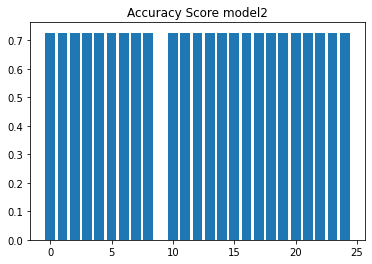

In [ ]:
accuracy2 = accuracy_score(y_test, results2)
plt.bar(target_values, accuracy2)
plt.title('Accuracy Score model2')
plt.show()

In [ ]:
accuracy2

0.7268544339096487

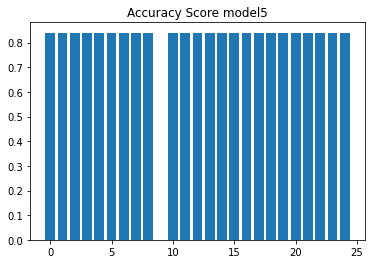

In [ ]:
accuracy5 = accuracy_score(y_test, results5)
plt.bar(target_values, accuracy5)
plt.title('Accuracy Score model5')
plt.show()

In [ ]:
accuracy5

0.8402119353039599

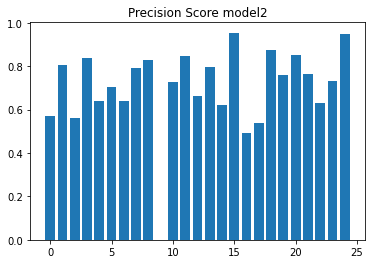

In [ ]:
precision2 = precision_score(y_test, results2, average=None)
plt.bar(target_values, precision2)
plt.title('Precision Score model2')
plt.show()

In [ ]:
np.average(precision2)

0.732537524862094

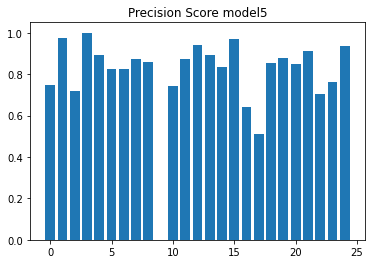

In [ ]:
precision5 = precision_score(y_test, results5, average=None)
plt.bar(target_values, precision5)
plt.title('Precision Score model5')
plt.show()

In [ ]:
np.average(precision5)

0.83375401585167

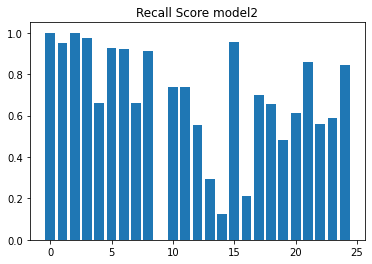

In [ ]:
recall2 = recall_score(y_test, results2, average=None)
plt.bar(target_values, recall2)
plt.title('Recall Score model2')
plt.show()

In [ ]:
np.average(recall2)

0.7051545692306789

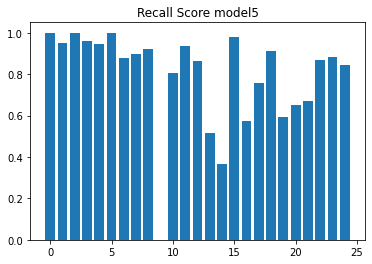

In [ ]:
recall5 = recall_score(y_test, results5, average=None)
plt.bar(target_values, recall5)
plt.title('Recall Score model5')
plt.show()

In [ ]:
np.average(recall5)

0.8239936050424443

values = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
values.shape

target_values

values[target_values]

target_values.shape

i = 157
plt.imshow(X_test[i])

values[y_test[i]], y_test[i]

values[np.argmax(model2.predict(X_test_norm[i:i+1]))]

np.where(y_test == 10)[0][7]

## Ensembling the models

In [71]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 1024)              5538816   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                        

In [72]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [73]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 500)              

In [74]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)             

In [75]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_14 (Dense)            (None, 750)              

In [155]:
def pred_conv(y_pred):
  pred = np.array([])
  for i in y_pred:
    pred = np.append(pred, i.argmax())
  return pred.astype("int32")

In [172]:
y_pred2 = pred_conv(model2.predict(X_test_norm))
y_pred5 = pred_conv(model5.predict(X_test_norm))
y_pred6 = pred_conv(model6.predict(X_test_norm))

225/225 [==============================] - 0s 2ms/step


In [173]:
y_pred_mat = np.array([y_pred2, y_pred5, y_pred6])

In [174]:
y_pred_mat.shape

(3, 7172)

In [175]:
y_pred_mat

array([[ 6,  5, 10, ...,  2,  1,  2],
       [ 6,  5, 10, ...,  2,  4,  2],
       [ 6,  5, 10, ...,  2,  1,  2]], dtype=int32)

In [176]:
ensemble_pred = np.array([])
for i in y_pred_mat.T:
  ensemble_pred = np.append(ensemble_pred, np.bincount(i).argmax())

In [177]:
ensemble_pred = ensemble_pred.astype("int32")

In [178]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [179]:
accuracy_score(y_test, ensemble_pred)

0.7704963747908533

In [180]:
accuracy_score(y_test, y_pred2)

0.743446737311768

In [181]:
accuracy_score(y_test, y_pred5)

0.8360290016731734

In [182]:
accuracy_score(y_test, y_pred6)

0.7566926938092582

0.7850194489228207

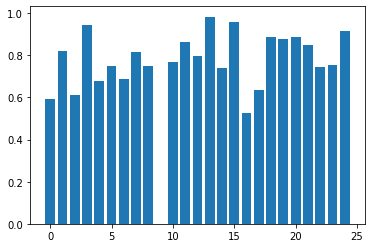

In [189]:
precision_e = precision_score(y_test, ensemble_pred, average=None)
plt.bar(target_values, precision_e)
precision_e.mean()

0.7536377728972911

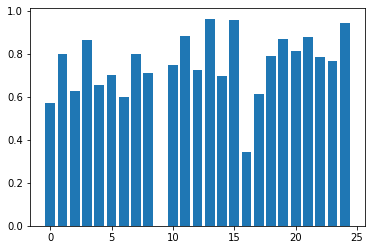

In [190]:
precision_2 = precision_score(y_test, y_pred2, average=None)
plt.bar(target_values, precision_2)
precision_2.mean()

0.8307196203135768

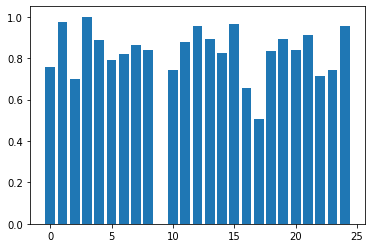

In [192]:
precision_5 = precision_score(y_test, y_pred5, average=None)
plt.bar(target_values, precision_5)
precision_5.mean()

0.7682221881011625

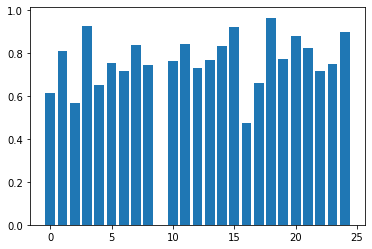

In [193]:
precision_6 = precision_score(y_test, y_pred6, average=None)
plt.bar(target_values, precision_6)
precision_6.mean()

0.7532556067268507

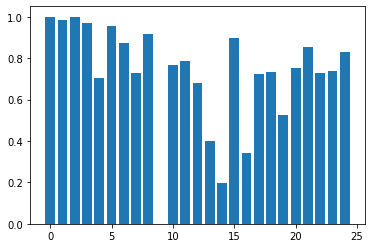

In [194]:
recall_e = recall_score(y_test, ensemble_pred, average=None)
plt.bar(target_values, recall_e)
recall_e.mean()

0.7256488990658688

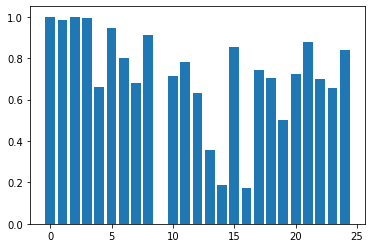

In [195]:
recall_2 = recall_score(y_test, y_pred2, average=None)
plt.bar(target_values, recall_2)
recall_2.mean()

0.820093671069575

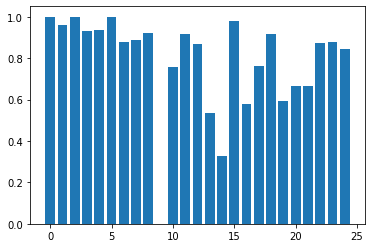

In [196]:
recall_5 = recall_score(y_test, y_pred5, average=None)
plt.bar(target_values, recall_5)
recall_5.mean()

0.7376122038147727

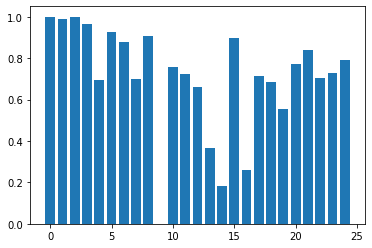

In [197]:
recall_6 = recall_score(y_test, y_pred6, average=None)
plt.bar(target_values, recall_6)
recall_6.mean()